# 3-1. 분석용 데이터 준비

### 기본 라이브러리 Import

In [ ]:
!pip install --upgrade scikit-learn
#!conda update -c conda-forge scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [87]:
# 관련 라이브러리 설치 & import
from google.colab import drive
import os, json, pickle
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# warning을 ignore 설정
import warnings
warnings.filterwarnings(action='ignore')

### 데이터 로드

In [88]:
# 구글 드라이브 mount
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [89]:
# 데이터 파일 위치
colab_path = "gdrive/My Drive/Colab Notebooks/KISIA/네트워크/part3/"

In [43]:
# 데이터 파일 로드
print(colab_path + "data/KDDCUP/kddcup.data_10_percent_corrected")
df_orig= pd.read_csv(colab_path + "data/KDDCUP/kddcup.data_10_percent_corrected", header=None) #CSV파일에 헤더가 존재하지 않음을 명시
df_orig

gdrive/My Drive/Colab Notebooks/KISIA/네트워크/part3/data/KDDCUP/kddcup.data_10_percent_corrected


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


### 새 섹션

duration: continuous.

protocol_type: symbolic.

service: symbolic.

flag: symbolic.

src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.

In [ ]:
col_str='duration: continuous.'
columns = col_str.split(':')[0]
columns

'duration'

In [44]:
# 별도 파일로 제공된 Feature name 파싱
columns = []
with open(colab_path + "data/KDDCUP/kddcup.names", "r") as f:
     for line in f:
         columns.append(line.split(':')[0])
columns = columns + ['label']   #가장 마지막 Feature는 Target
df_orig.columns = columns
df_orig

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [6]:
df_orig.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [45]:
# 컬럼명 지정
df_orig.columns = columns
df_orig[1:25][:]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.
10,0,tcp,http,SF,210,624,0,0,0,0,...,109,1.0,0.0,0.06,0.05,0.0,0.0,0.0,0.0,normal.


### 공격 유형 설명
---

관련 논문
https://www.ecb.torontomu.ca/~bagheri/papers/cisda.pdf
<br>
<br>

|Category|Descryption|
|:---|:---|
 |Denial of Service Attack (**DoS**)| is an attack in which the attacker makes some computing or memory resource too busy <br>or too full to handle legitimate requests, or denies legitimate users access to a machine.<br>|
|User to Root Attack (**U2R**)| is a class of exploit in which the attacker starts out with access to a normal user account on the system <br>(perhaps gained by sniffing passwords, a dictionary attack, or social engineering) and is able to exploit some vulnerability <br>to gain root access to the system.|
|Remote to Local Attack (**R2L**)| occurs when an attacker who has the ability to send packets to a machine over a network <br>but who does not have an account on that machine exploits some vulnerability to gain local access <br>as a user of that machine.|
|Probing Attack| is an attempt to gather information about a network of computers for the apparent purpose of circumventing its security controls.|

------


|attack name | category|
|:---|---:|
|back|dos|
|land|dos|
|neptune|dos|
|pod|dos|
|smurf|dos|
|teardrop|dos|
|buffer_overflow|u2r|
|loadmodule|u2r|
|multihop|r2l|
|phf|r2l|
|perl|u2r|
|rootkit|u2r|
|spy|r2l|
|guess_passwd|r2l|
|ftp_write|r2l|
|imap|r2l|
|warezclient|r2l|
|warezmaster|r2l|
|ipsweep|probe|
|nmap|probe|
|portsweep|probe|
|satan|probe|
|normal|normal|


In [46]:
df_orig['label']

0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494016    normal.
494017    normal.
494018    normal.
494019    normal.
494020    normal.
Name: label, Length: 494021, dtype: object

In [47]:
# 공격 유형 확인
df_orig['label'] = df_orig['label'].str.rstrip('.')  #공격명 끝에 붙은 마침표 '.' 제거
df_orig['label'].value_counts()

label
smurf              280790
neptune            107201
normal              97278
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64

In [48]:
f = open(colab_path + "data/KDDCUP/kddcup.training_attack_types", "r")
attack_list = f.readline().split(' ')#[1]
attack_list

['back', 'dos\n']

In [49]:
# 카테고리 정보 파싱
attack_type = dict()
with open(colab_path + "data/KDDCUP/kddcup.training_attack_types", "r") as f:
     for line in f.readlines():
         attack_type[line.strip().split(' ')[0]] = line.strip().split(' ')[1]
attack_type['normal'] = 'normal'  #정상 공격에 대해서는 'normal'이라는 카테고리를 할당한다.

In [50]:
attack_type

{'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'normal': 'normal'}

In [51]:
# 카테고리 정보 추가
def map_cate(row):
  """attack_type에 정의된 공격명 label 값에 해당하는 카테고리 리턴한다.
     map_cate(row)
     row
      DataFrame의 각 row
  """
  return attack_type[row['label']]

df_orig['label_cate'] = df_orig.apply(map_cate, axis=1)   #정의한 함수를 DataFrame에 적용한다., axis=1 각 row에 map_cate 적용
df_orig['label_cate'].value_counts(dropna=False)

label_cate
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [52]:
df_orig

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label_cate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal,normal


In [53]:
# target을 정상/공격으로 binary화
df_orig['label_binary'] = df_orig['label_cate'].map({'normal':0, 'dos':1, 'probe':1, 'r2l':1, 'u2r':1})
df_orig['label_binary'].value_counts(dropna=False)

label_binary
1    396743
0     97278
Name: count, dtype: int64

# 3-1. 분석용 데이터 준비: 전처리

---



### 전처리 - 결측치 처리

In [54]:
# 결측치 확인
df_orig.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### 전처리 - 이상값 처리

38

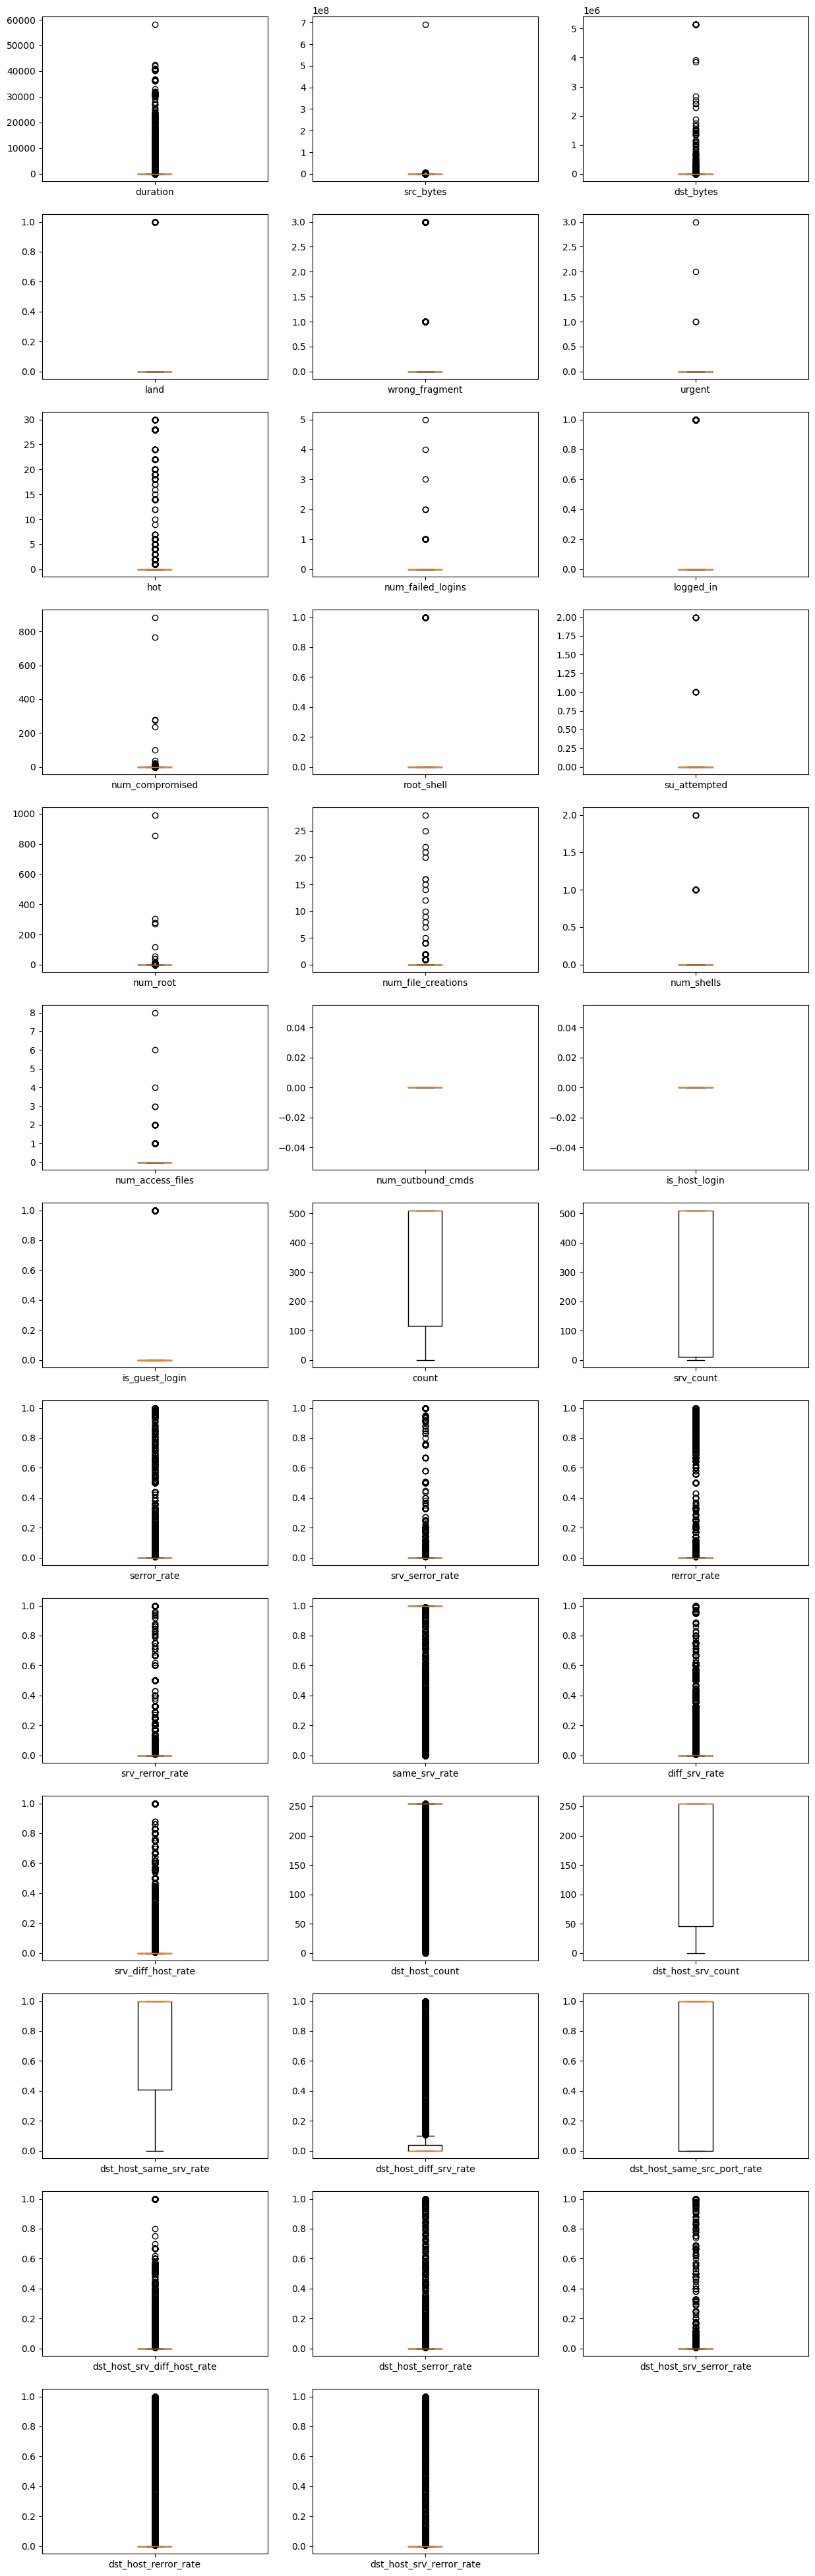

In [25]:
# 랜덤으로 3개 Feature를 시각화하여 탐색한다.
# BoxPlot으로 확인
plt.figure(figsize=(15,50))
cols = df_orig.columns.drop(['protocol_type', 'service', 'flag', 'label', 'label_cate', 'label_binary'])  #명목형변수, 레이블 변수 제외
rnd_idx = np.random.randint(low=0, high=len(cols), size=3)

# for i in range(3):
#     plt.subplot(1, 3, i+1) # 3행 3열의 9개의 그래프 중 (i+1)번째로 state 이동
#     plt.boxplot([df_orig[cols[rnd_idx[i]]]])
#     plt.xticks([1],[cols[rnd_idx[i]]])

# for i in range(3):
#     plt.subplot(1, 3, i+1) # 3행 3열의 9개의 그래프 중 (i+1)번째로 state 이동
#     plt.boxplot([df_orig[cols[rnd_idx[i]]]])
#     plt.xticks([1],[cols[rnd_idx[i]]])

for i in range(cols.size):
    plt.subplot(13, 3, i+1) # 3행 3열의 9개의 그래프 중 (i+1)번째로 state 이동
    plt.boxplot([df_orig[cols[i]]])
    plt.xticks([1],[cols[i]])


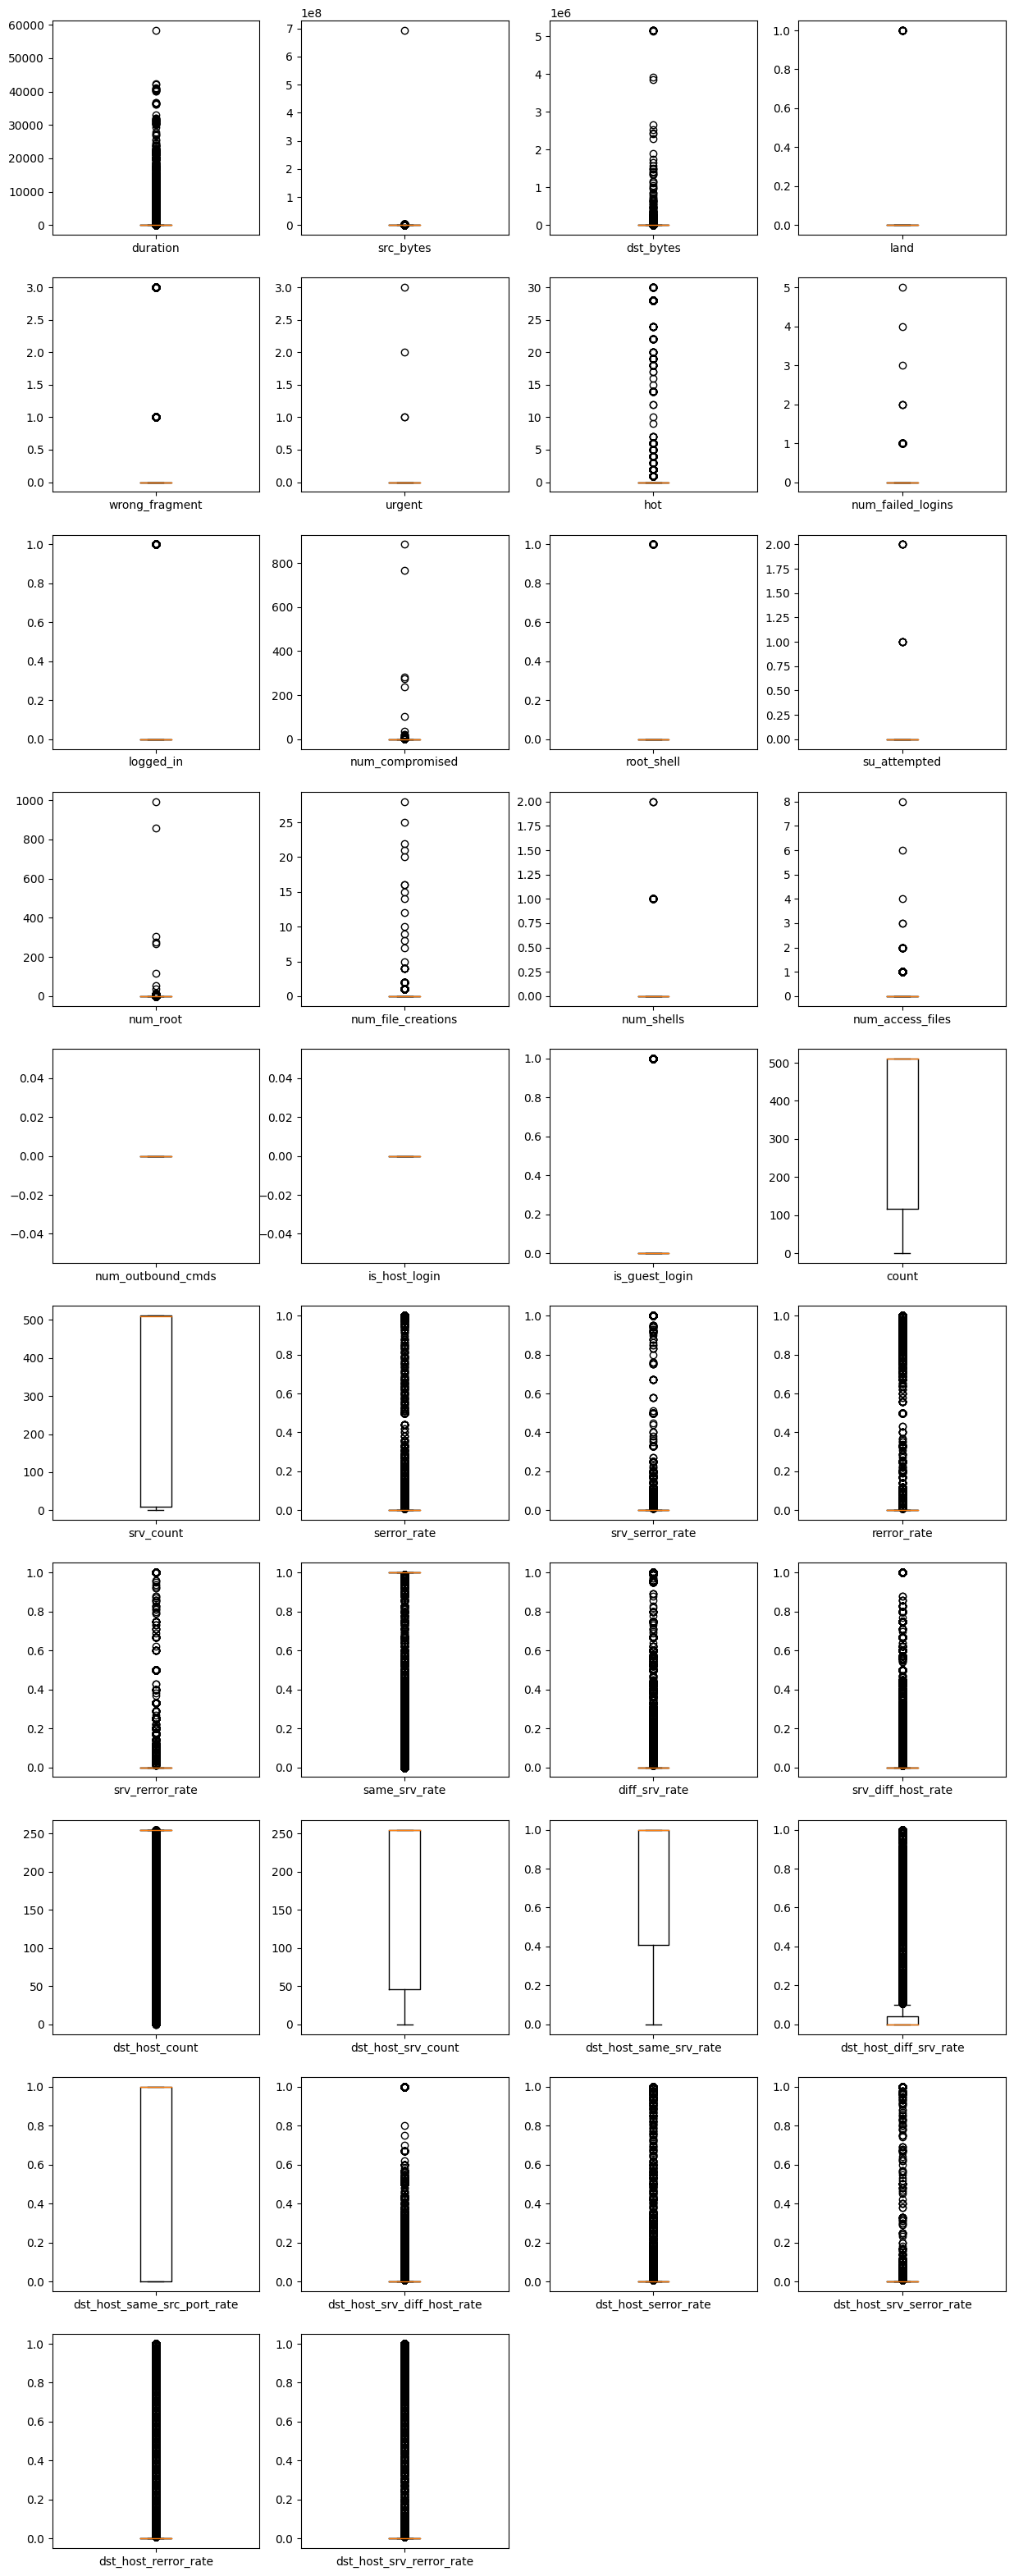

In [ ]:
# 랜덤으로 3개 Feature를 시각화하여 탐색한다.
# BoxPlot으로 확인
plt.figure(figsize=(15,40))
cols = df_orig.columns.drop(['protocol_type', 'service', 'flag', 'label', 'label_cate', 'label_binary'])  #명목형변수, 레이블 변수 제외
rnd_idx = np.random.randint(low=0, high=len(cols), size=3)
"""for i in range(3):
    plt.subplot(1, 3, i+1) # 3행 3열의 9개의 그래프 중 (i+1)번째로 state 이동
    plt.boxplot([df_orig[cols[rnd_idx[i]]]])
    plt.xticks([1],[cols[rnd_idx[i]]])
"""
i=0
for col2 in cols:
    i= i +1
    plt.subplot(10, 4, i) # 3행 3열의 9개의 그래프 중 (i+1)번째로 state 이동
    plt.boxplot([df_orig[col2]])
    plt.xticks([1],[col2])
#cols


In [ ]:
df_orig['duration'].value_counts()

duration
0        481671
1          2476
2           870
3           625
5           554
          ...  
18185         1
4283          1
2154          1
1007          1
120           1
Name: count, Length: 2495, dtype: int64

### 전처리 - 정규화, 인코딩 ==> 전처리 되기 이전의 데이터 원본값을 탐색하고자 탐색적 분석 이후에 수행한다.

# 3-3. 탐색적 분석

In [26]:
# 탐색할 Feature 지정
# 아래 변수를 변경해가며 Feature에 대해 탐색적 분석을 수행해본다.
feat = 'duration'

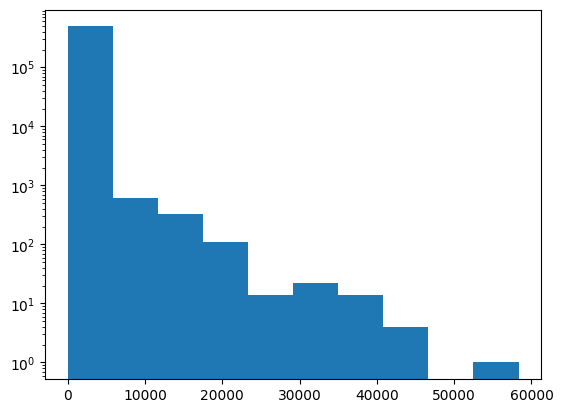

In [27]:
plt.hist(df_orig[feat])
plt.yscale('log')
#plt.xticks([2],[feat])

In [28]:
df_orig[feat].describe()

count    494021.000000
mean         47.979302
std         707.746472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       58329.000000
Name: duration, dtype: float64

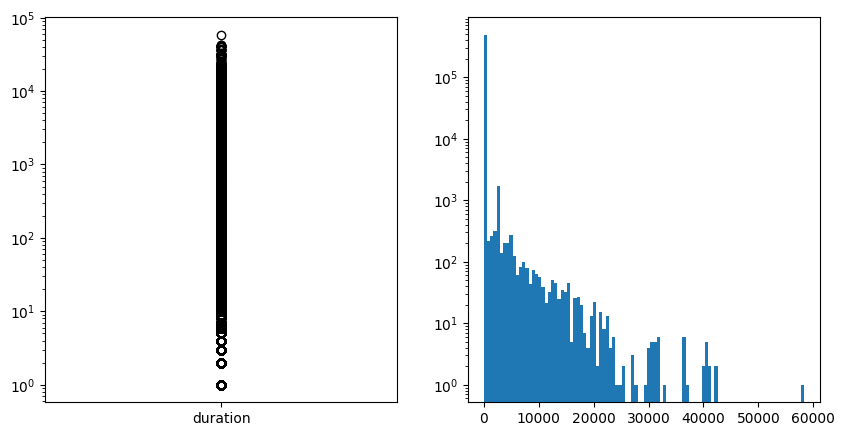

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1) # 3행 3열의 9개의 그래프 중 (i+1)번째로 state 이동
plt.boxplot([df_orig[feat]])
plt.yscale('log')
plt.xticks([1],[feat])
plt.subplot(1, 2, 2) # 3행 3열의 9개의 그래프 중 (i+1)번째로 state 이동
plt.hist([df_orig[feat]],bins=100)
plt.yscale('log')


In [29]:
# 구성요소 확인
if df_orig[feat].nunique() < 7:
    print(df_orig[feat].value_counts().sort_index())
else:
    print(df_orig[feat].describe())


count    494021.000000
mean         47.979302
std         707.746472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       58329.000000
Name: duration, dtype: float64


<Axes: xlabel='label', ylabel='duration'>

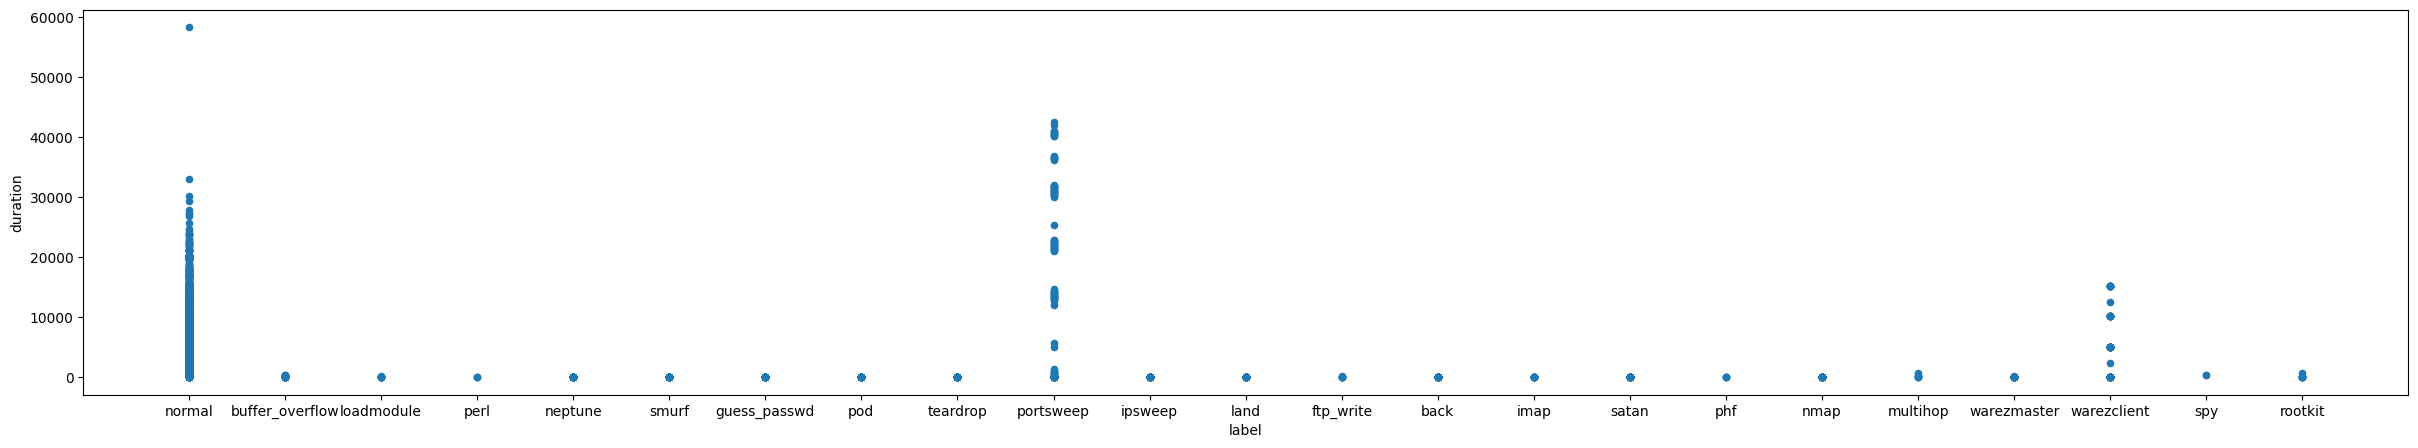

In [30]:
# 공격 유형별 산포도 분석
df_orig.plot.scatter(x='label', y=feat, figsize=(30, 5))#, logy='sym')

<Axes: xlabel='label_cate', ylabel='duration'>

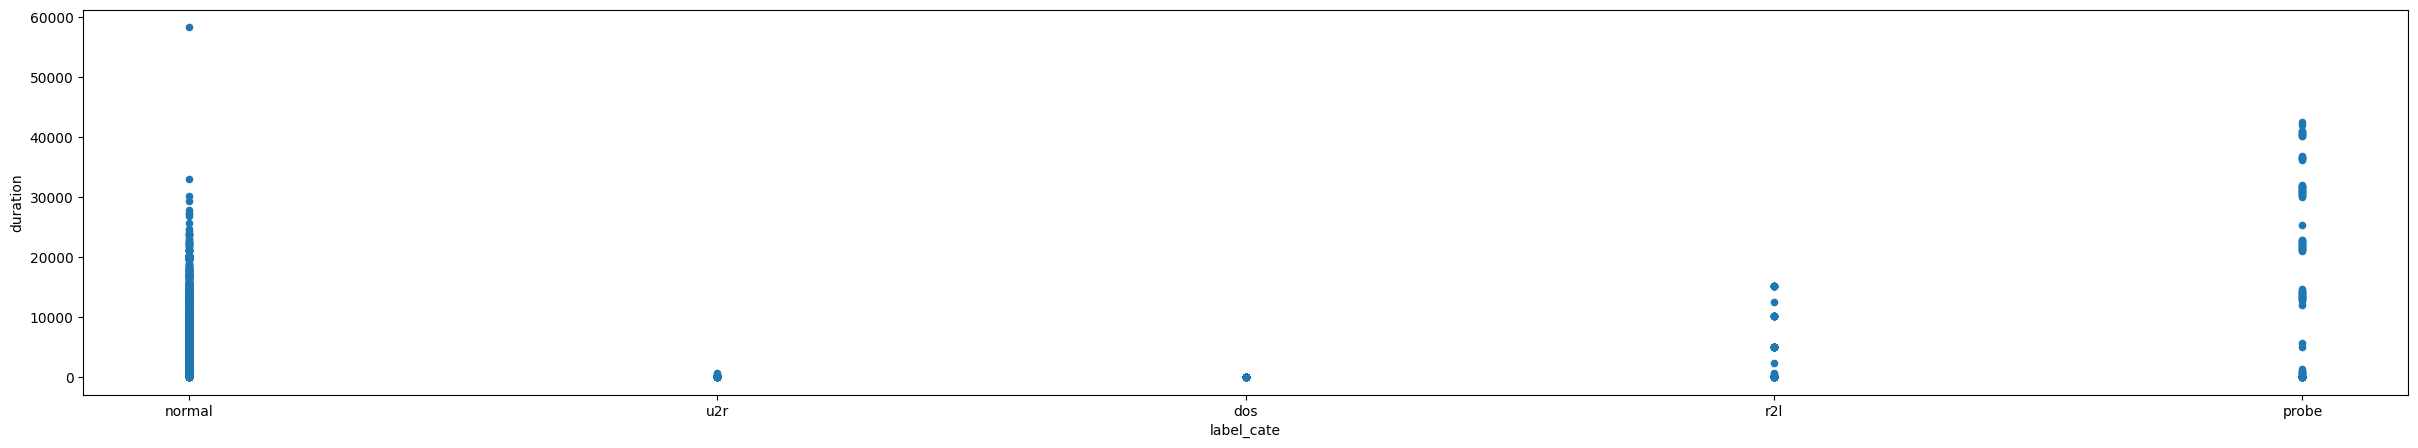

In [31]:
# 공격 카테고리별 산포도 분석
df_orig.plot.scatter(x='label_cate', y=feat, figsize=(30, 5))

In [32]:
feat="protocol_type"
# 공격 카테고리별 구성요소의 count (구성요소의 개수가 한정적인 경우에 한하여)
if df_orig[feat].nunique() < 7:
    print(df_orig.groupby([feat, 'label_cate'])['label_cate'].count())
else:
    print("구성요소의 수가 너무 많습니다")

protocol_type  label_cate
icmp           dos           281054
               normal          1288
               probe           1260
tcp            dos           109425
               normal         76813
               probe           2652
               r2l             1126
               u2r               49
udp            dos              979
               normal         19177
               probe            195
               u2r                3
Name: label_cate, dtype: int64


In [ ]:
df_orig.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
np.corrcoef(df_orig['duration'].values, df_orig['dst_host_diff_srv_rate'].values)

array([[1.        , 0.40623261],
       [0.40623261, 1.        ]])

In [33]:
# 상관관계가 높은 topN개의 Feature
feat = 'duration'
if feat not in df_orig.select_dtypes(include=['object']).columns:
  corr_dict = dict()
  for feat_against in df_orig.select_dtypes(include=['int64', \
                      'float64']).columns:  #명목형 Feature 제외
      corr_dict[feat_against] = np.corrcoef(df_orig[feat].values, \
                      df_orig[feat_against].values)[0][1]

  print(Counter(corr_dict).most_common(5))
else:
  print("해당 feature에 대해서는 상관관계를 계산할 수 없습니다.")

[('duration', 1.0), ('dst_host_diff_srv_rate', 0.406232608941333), ('num_file_creations', 0.07456174131911754), ('num_compromised', 0.058095016367806486), ('num_root', 0.05676597485927465)]


[('duration', 1.0),

('dst_host_diff_srv_rate', 0.406232608941333),

('num_file_creations', 0.07456174131911754),

('num_compromised', 0.058095016367806486),

('num_root', 0.05676597485927465)]

### duration의 상관계수
---

|label|ABS(상관계수)|label|상관계수|
|:---|:---|:---|:---|
|duration|1.0|duration|1.0|
|dst_host_diff_srv_rate|0.406232608941333|dst_host_diff_srv_rate|0.406232608941333|
|dst_host_same_srv_rate|-0.11845783449635237|num_file_creations|0.07456174131911754|
|label_binary|-0.11801410042328572|num_compromised|0.058095016367806486|
|dst_host_srv_count|-0.11751508187710565|num_root|0.05676597485927465|
|count|-0.10515338141725185|su_attempted|0.05585344046325514|
|srv_count|-0.08024996284480533|diff_srv_rate|0.05180020847711009|
|num_file_creations|0.07456174131911754|dst_host_same_src_port_rate|0.04264239637858826|
|num_compromised|0.058095016367806486|num_access_files|0.02566120721972954|
|num_root|0.05676597485927465|is_guest_login|0.023423711172059446|
|su_attempted|0.05585344046325514|same_srv_rate|0.0217708601001664|
|diff_srv_rate|0.05180020847711009|root_shell|0.021339770053480797|
|dst_host_same_src_port_rate|0.04264239637858826|hot|0.013212927753620662|
|serror_rate|-0.03141555316690577|srv_rerror_rate|0.012106443540522127|
|srv_serror_rate|-0.031377780036494385|rerror_rate|0.012053302244517288|
|dst_host_srv_serror_rate|-0.030612353797975275|dst_host_srv_rerror_rate|0.01046463794172776|
|dst_host_serror_rate|-0.030400204171599318|dst_host_count|0.010073842749599934|
|num_access_files|0.02566120721972954|dst_host_rerror_rate|0.006739163147266414|
|is_guest_login|0.023423711172059446|dst_bytes|0.005439534478234236|
|same_srv_rate|0.0217708601001664|num_failed_logins|0.005238859915181583|
|root_shell|0.021339770053480797|src_bytes|0.004258230269506433|
|logged_in|-0.017265158275510898|urgent|0.0037859965399106767|
|hot|0.013212927753620662|num_shells|-0.00016918621378911273|
|srv_rerror_rate|0.012106443540522127|land|-0.0004524024642071997|
|rerror_rate|0.012053302244517288|wrong_fragment|-0.00323503347207913|
|srv_diff_host_rate|-0.011789928502610219|dst_host_srv_diff_host_rate|-0.006982718157860012|
|dst_host_srv_rerror_rate|0.01046463794172776|srv_diff_host_rate|-0.011789928502610219|
|dst_host_count|0.010073842749599934|logged_in|-0.017265158275510898|
|dst_host_srv_diff_host_rate|-0.006982718157860012|dst_host_serror_rate|-0.030400204171599318|
|dst_host_rerror_rate|0.006739163147266414|dst_host_srv_serror_rate|-0.030612353797975275|
|dst_bytes|0.005439534478234236|srv_serror_rate|-0.031377780036494385|
|num_failed_logins|0.005238859915181583|serror_rate|-0.03141555316690577|
|src_bytes|0.004258230269506433|srv_count|-0.08024996284480533|
|urgent|0.0037859965399106767|count|-0.10515338141725185|
|wrong_fragment|-0.00323503347207913|dst_host_srv_count|-0.11751508187710565|
|land|-0.0004524024642071997|label_binary|-0.11801410042328572|
|num_shells|-0.00016918621378911273|dst_host_same_srv_rate|-0.11845783449635237|

# 3-1. 분석용 데이터 준비: 전처리 (이어서)

### 전처리 - 정규화
---

Z-Score 정규화 진행

정규분포 mapping

In [55]:
# 데이터 정규화
columns_to_scale = df_orig.select_dtypes(include=['int64', 'float64']).columns.drop(['label_binary'])
#Feature의 수가 많아 나열하지 않고 연속형 변수에 대해서만 정규화 진행. 이중 우리가 생성한 labe_binary(0/1)은 제외하고 진행
scaler_train = preprocessing.StandardScaler()
scaler_train = scaler_train.fit(df_orig[columns_to_scale])
df_orig[columns_to_scale] = scaler_train.transform(df_orig[columns_to_scale])
df_orig

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label_cate,label_binary
0,-0.067792,tcp,http,SF,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
1,-0.067792,tcp,http,SF,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
2,-0.067792,tcp,http,SF,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
3,-0.067792,tcp,http,SF,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
4,-0.067792,tcp,http,SF,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,tcp,http,SF,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.229844,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal,normal,0
494017,-0.067792,tcp,http,SF,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-0.897417,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal,normal,0
494018,-0.067792,tcp,http,SF,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.125961,1.028094,-0.306769,-0.436950,-0.25204,-0.249464,normal,normal,0
494019,-0.067792,tcp,http,SF,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.167514,1.028094,-0.359318,-0.436950,-0.25204,-0.249464,normal,normal,0


In [ ]:
df_orig


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label_cate,label_binary
0,-0.067792,tcp,http,SF,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.022077,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
1,-0.067792,tcp,http,SF,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.146737,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
2,-0.067792,tcp,http,SF,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
3,-0.067792,tcp,http,SF,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.188291,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
4,-0.067792,tcp,http,SF,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.209067,-0.158629,-0.464418,-0.463202,-0.25204,-0.249464,normal,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,tcp,http,SF,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.229844,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal,normal,0
494017,-0.067792,tcp,http,SF,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-0.897417,1.028094,-0.464418,-0.436950,-0.25204,-0.249464,normal,normal,0
494018,-0.067792,tcp,http,SF,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.125961,1.028094,-0.306769,-0.436950,-0.25204,-0.249464,normal,normal,0
494019,-0.067792,tcp,http,SF,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,...,-0.282867,-1.167514,1.028094,-0.359318,-0.436950,-0.25204,-0.249464,normal,normal,0


### 전처리 - 데이터 인코딩

In [56]:
df_orig, columns

(        duration protocol_type service flag  src_bytes  dst_bytes      land  \
 0      -0.067792           tcp    http   SF  -0.002879   0.138664 -0.006673   
 1      -0.067792           tcp    http   SF  -0.002820  -0.011578 -0.006673   
 2      -0.067792           tcp    http   SF  -0.002824   0.014179 -0.006673   
 3      -0.067792           tcp    http   SF  -0.002840   0.014179 -0.006673   
 4      -0.067792           tcp    http   SF  -0.002842   0.035214 -0.006673   
 ...          ...           ...     ...  ...        ...        ...       ...   
 494016 -0.067792           tcp    http   SF  -0.002748   0.030644 -0.006673   
 494017 -0.067792           tcp    http   SF  -0.002776   0.042902 -0.006673   
 494018 -0.067792           tcp    http   SF  -0.002856   0.010032 -0.006673   
 494019 -0.067792           tcp    http   SF  -0.002767   0.010032 -0.006673   
 494020 -0.067792           tcp    http   SF  -0.002840   0.011061 -0.006673   
 
         wrong_fragment    urgent     

In [57]:
# 데이터 인코딩
df_encoding = pd.get_dummies(df_orig, columns = ['protocol_type', 'service', 'flag'])  #명목형 변수에 대해 One-Hot 인코딩 수행
df_encoding

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.067792,-0.002879,0.138664,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False
1,-0.067792,-0.002820,-0.011578,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False
2,-0.067792,-0.002824,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False
3,-0.067792,-0.002840,0.014179,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False
4,-0.067792,-0.002842,0.035214,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,-0.067792,-0.002748,0.030644,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False
494017,-0.067792,-0.002776,0.042902,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False
494018,-0.067792,-0.002856,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False
494019,-0.067792,-0.002767,0.010032,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.39698,-0.005679,...,False,False,False,False,False,False,False,False,True,False


In [58]:
len(df_encoding.columns)

121

In [38]:
# 인코딩 결과 확인
df_encoding['flag_RSTR'].value_counts()

flag_RSTR
False    493118
True        903
Name: count, dtype: int64

In [64]:
#전처리된 데이터 저장
print(colab_path)
df_encoding.to_csv(colab_path + 'data_processed/kdd_processed_all_20240725.csv', index=False)

gdrive/My Drive/Colab Notebooks/KISIA/네트워크/part3/


# 3-4. 모델링

In [90]:
#전처리된 데이터 로드
#df_orig = pd.read_csv(colab_path + 'data_processed/kdd_processed_all.csv',nrows=1500000)
df_orig2 = pd.read_csv(colab_path + 'data_processed/kdd_processed_all_20240725.csv',nrows=1500000)


In [91]:
df_orig2.shape

(494021, 121)

In [93]:
# 학습할 Feature 선택 및 Feature(X), Label(y) 분리
# 1번째로, Logistic Regression(Binary Classification 모드)를 적용하기 위해 'label_binary를 타깃으로 한다.
target_col = 'label'
cols_to_exclude = ['label', 'label_cate', 'label_binary']
cols_to_train = df_orig2.columns.drop(cols_to_exclude)
y = df_orig2[target_col]
X = df_orig2[cols_to_train]

In [94]:
X.shape

(494021, 118)

In [95]:
y

0         normal
1         normal
2         normal
3         normal
4         normal
           ...  
494016    normal
494017    normal
494018    normal
494019    normal
494020    normal
Name: label, Length: 494021, dtype: object

In [ ]:
494021*0.7

345814.69999999995

In [ ]:
train_test_split??

In [96]:
# 테스트용 데이터 분할 (전체 데이터의 30%, 랜덤 추출)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42 )
train_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
228201,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False
483696,-0.067792,-0.002811,0.077072,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396980,-0.005679,...,False,False,False,False,False,False,False,False,True,False
234556,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False
127627,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,True,False,False,False,False,False
463534,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False
365838,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,True,False,False,False,False,False
131932,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False
146867,12.847863,-0.002913,-0.023109,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False


####로지스틱 회귀 (Logistic Regression)
---

*   로지스틱 회귀의 예측함수 정의
*   로지스틱 회귀는 두개의 클래스에 대한 이진분류를 위한 모델

$$
\sigma (x)=\frac{1}{1+e^{-x}}\\
\hat{y} = \sigma (b_0+b_1x) =\frac{1}{1+e^{-(b_0+b_1x)}}\\
$$
*   $\sigma$ : 시그모이드 함수

*   로지스틱 회귀 모델은 선형회귀 모델에 시그모이드 함수를 적용
*   로지스틱 회귀의 목표는 바이너리 크로스 엔트로피를 **최소화** 하는 파라미터 **$w$**를 찾는것


$$
BinaryCrossEntropy(x) = -\frac{1}{N} \sum_{i=1}^N y_i \log\big(\hat{y_i}\big) + (1-y_i) \log\big(1- \hat{y_i}\big)
$$

*   $y$ 관측값, $\hat{y}$ 추정값(예측값)

*   공부시간과 시험 패스와의 상관성 로지스틱 회귀 결과


![공부시간과 시험 패스하는 것과의 상관성](https://drive.google.com/uc?id=139XCZWBmzy_DxPyv1UjjYJYaILyntl2y)


---
[LateX 수식 작성법](https://velog.io/@d2h10s/LaTex-Markdown-%EC%88%98%EC%8B%9D-%EC%9E%91%EC%84%B1%EB%B2%95)





In [ ]:
LogisticRegression??

In [72]:
%%time
# LogisticRegression으로 Classification 수행.
model = LogisticRegression(max_iter=100, C=1, random_state=42)
model.fit(train_X, train_y)

CPU times: user 17.7 s, sys: 4.34 s, total: 22.1 s
Wall time: 16 s


LogisticRegression(C=1, random_state=42)

In [73]:
print("train data score : {} ", format(model.score(train_X,train_y)))
print("test data score : {} ", format(model.score(test_X,test_y)))

train data score : {}  0.9986640216995263
test data score : {}  0.998495347723117


In [74]:
# 모델 검증. 모델 과소/과대적합 검증은 Cross Validation 기법을 활용한다.
scores = cross_validate(model, train_X, train_y, cv=5)
scores

{'fit_time': array([10.28255439, 10.59762049,  8.93659067, 10.14298582, 10.22589755]),
 'score_time': array([0.07657909, 0.07798648, 0.15220237, 0.07342458, 0.08684134]),
 'test_score': array([0.99868427, 0.99845293, 0.99813484, 0.99855414, 0.99858304])}

In [75]:
np.mean(scores['test_score'])

0.9984818431329957

In [76]:
# 최적의 파라미터 탐색
# GridSearch 할 대상 하이퍼파라미터
params = {
"C": [1,5,10,20],
}
gs = GridSearchCV(model, params)
gs.fit(train_X, train_y)
print("Best Score:" + str(gs.best_score_))
print("Best Parameter:" + str(gs.best_params_))
# best estimator를 model에 반영
model.set_params(**gs.best_params_)
model.fit(train_X, train_y)

Best Score:0.9985772695858344
Best Parameter:{'C': 10}


LogisticRegression(C=10, random_state=42)

In [77]:
model = LogisticRegression(C=10, max_iter=100, random_state=42)
model.fit(train_X, train_y)

LogisticRegression(C=10, random_state=42)

In [78]:
model.score(test_X, test_y)

0.9984278745268442

[[ 29080    112]
 [   121 118894]]


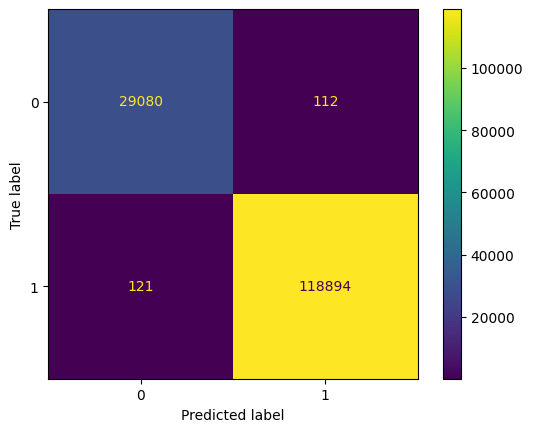

In [79]:
# 테스트 데이터에 대한 예측 값 산출
pred_y = model.predict(test_X)

# 모델 성능 - confusion matrix
conf_mat = confusion_matrix(y_true=test_y, y_pred=pred_y)
print(conf_mat)

disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
disp.plot()

###GridSearchCV
---

```python
class sklearn.model_selection.GridSearchCV(estimator, param_grid, *,
scoring=None, n_jobs=None, refit=True, cv=None, verbose=0,
 pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]
```

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.


https://velog.io/@hyunicecream/GridSearchCV%EB%9E%80-%EC%96%B4%EB%96%BB%EA%B2%8C-%EC%82%AC%EC%9A%A9%ED%95%A0%EA%B9%8C


In [ ]:
# 최적의 파라미터 탐색
# GridSearch 할 대상 하이퍼파라미터
params = {
    "C": [1,5,10,20],
}
gs = GridSearchCV(model, params)
gs.fit(train_X, train_y)
print("Best Score:" + str(gs.best_score_))
print("Best Parameter:" + str(gs.best_params_))

# best estimator를 model에 반영
model.set_params(**gs.best_params_)
model.fit(train_X, train_y)

Best Score:0.9985743779498948
Best Parameter:{'C': 10}


LogisticRegression(C=10, random_state=42)

In [ ]:
gs.cv_results_

{'mean_fit_time': array([ 3.72376094, 10.32885957,  9.62376537, 10.31536579]),
 'std_fit_time': array([0.54899697, 0.7523499 , 0.85995659, 0.75369993]),
 'mean_score_time': array([0.09049354, 0.06686373, 0.08451452, 0.09535027]),
 'std_score_time': array([0.02899263, 0.00092995, 0.02478279, 0.0359864 ]),
 'param_C': masked_array(data=[0.001, 10.0, 20.0, 1000.0],
              mask=[False, False, False, False],
        fill_value=1e+20),
 'params': [{'C': 0.001}, {'C': 10}, {'C': 20}, {'C': 1000}],
 'split0_test_score': array([0.99232248, 0.99875656, 0.99881439, 0.99864089]),
 'split1_test_score': array([0.99313217, 0.99853968, 0.99858306, 0.99846739]),
 'split2_test_score': array([0.99190319, 0.99845293, 0.9983228 , 0.9983228 ]),
 'split3_test_score': array([0.99227911, 0.99861197, 0.99848185, 0.99864089]),
 'split4_test_score': array([0.99216333, 0.99851074, 0.9985975 , 0.99849628]),
 'mean_test_score': array([0.99236005, 0.99857438, 0.99855992, 0.99851365]),
 'std_test_score': array(

# 3-6. 모델 적용 및 운영방안 수립

In [80]:
# 모델 성능 - accuracy
model.score(test_X, test_y)

0.9984278745268442

In [ ]:
# 테스트 데이터에 대한 예측 값 산출
pred_y = model.predict(test_X)

# 모델 성능 - confusion matrix
conf_mat = confusion_matrix(y_true=test_y, y_pred=pred_y)
conf_mat

array([[ 29084,    108],
       [   122, 118893]])

###Accuracy, Precision, Recall ,F1-Score
---

||P|N|
|:---:|:---:|:---:|
|PP|TP|FP|
|PN|FN|TN|

Accuracy (ACC) =
$\frac{TP + TN}{P + N}$


Precision (ACC) =
$\frac{TP}{TP + FP}$

Recall (ACC) =
$\frac{TP}{P} = \frac{TP}{TP+FN}$

F1-Score = $\frac{2*Precision*Recall}{Precision+Recall}$


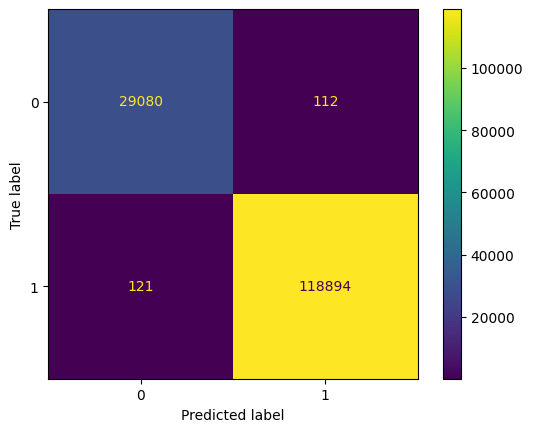

In [81]:
# confusion matrix 시각화

#disp = ConfusionMatrixDisplay(conf_mat)
disp = ConfusionMatrixDisplay(conf_mat, display_labels=model.classes_)
disp.plot()
#disp.show()

# 3-4.모델링 (Multi-Class Classification)

In [97]:
# 학습할 Feature 선택 및 Feature(X), Label(y) 분리
# 2번째로, Logistic Regression(Multi Class Classification 모드)를 적용하기 위해 'label_cate를 타깃으로 한다.
target_col = 'label'
cols_to_exclude = ['label', 'label_cate', 'label_binary']
cols_to_train = df_orig2.columns.drop(cols_to_exclude)
y = df_orig2[target_col]
X = df_orig2[cols_to_train]
y.value_counts()

label
smurf              280790
neptune            107201
normal              97278
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64

In [98]:
train_y

228201      smurf
483696     normal
234556      smurf
127627    neptune
463534    neptune
           ...   
259178      smurf
365838    neptune
131932      smurf
146867     normal
121958    neptune
Name: label, Length: 345814, dtype: object

In [99]:
# 테스트용 데이터 분할 (전체 데이터의 30%, 랜덤 추출)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42 )
train_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
228201,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False
483696,-0.067792,-0.002811,0.077072,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,2.396980,-0.005679,...,False,False,False,False,False,False,False,False,True,False
234556,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False
127627,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,True,False,False,False,False,False
463534,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False
365838,-0.067792,-0.003062,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,True,False,False,False,False,False
131932,-0.067792,-0.002017,-0.026287,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False
146867,12.847863,-0.002913,-0.023109,-0.006673,-0.04772,-0.002571,-0.044136,-0.009782,-0.417192,-0.005679,...,False,False,False,False,False,False,False,False,True,False


In [100]:
%%time
# 모델 학습
model_over = LogisticRegression(C=20, max_iter=100, random_state=42, multi_class='ovr')
#model = LogisticRegression(C=20, max_iter=100, random_state=42, multi_class='multinomial')
model_over.fit(train_X, train_y)
scores = cross_validate(model_over, train_X, train_y, cv=5)
scores

CPU times: user 38min 39s, sys: 4min 59s, total: 43min 38s
Wall time: 26min 36s


{'fit_time': array([266.7906208 , 257.08164334, 244.17075396, 247.44179583,
        249.90560389]),
 'score_time': array([0.29142189, 0.26669693, 0.3680141 , 0.45905924, 0.28260183]),
 'test_score': array([0.99914694, 0.99923369, 0.99906019, 0.99911803, 0.99894451])}

In [101]:
np.mean(scores['test_score'])

0.9991006721643281

In [110]:
# 테스트 데이터에 대한 예측 값 산출
pred_y = model_over.predict(test_X)

# 모델 성능 - confusion matrix
#conf_mat = confusion_matrix(y_true=test_y, y_pred=pred_y, labels=['normal', 'dos', 'probe', 'r2l', 'u2r'])
conf_mat = confusion_matrix(y_true=test_y, y_pred=pred_y)
conf_mat

array([[  653,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     4,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     6,     0,     0,     0,     0,     0,     2,     0,
            0,     0,     3,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,    11,     0,     0,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     2,     0,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   375,     0,     0,     0,
            0,     3,     7,     0

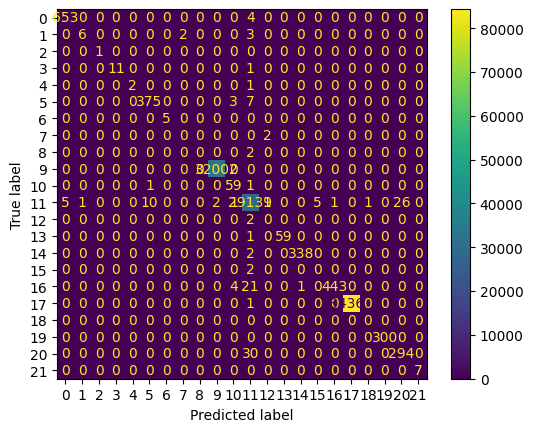

In [111]:
# confusion matrix 시각화
#disp = ConfusionMatrixDisplay(conf_mat, display_labels=['normal', 'dos', 'probe', 'r2l', 'u2r'])
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()

##multinomial 방식(model_softmax)

In [ ]:
%%time
# 모델 학습
#model = LogisticRegression(C=20, max_iter=100, random_state=42, multi_class='ovr')
model = LogisticRegression(C=20, max_iter=100, random_state=42, multi_class='multinomial')
model.fit(train_X, train_y)
scores = cross_validate(model, train_X, train_y, cv=5)
scores

CPU times: user 3min 18s, sys: 51.9 s, total: 4min 10s
Wall time: 2min 45s


{'fit_time': array([25.31364942, 28.13622117, 25.09160686, 23.08700657, 24.16677022]),
 'score_time': array([0.24127269, 0.23157573, 0.40190411, 0.25144649, 0.23674941]),
 'test_score': array([0.99894452, 0.99910357, 0.99887223, 0.99903127, 0.99895897])}

In [ ]:
np.mean(scores['test_score'])

0.9989821117041362

In [ ]:
# 테스트 데이터에 대한 예측 값 산출
pred_y = model.predict(test_X)

# 모델 성능 - confusion matrix
conf_mat = confusion_matrix(y_true=test_y, y_pred=pred_y, labels=['normal', 'dos', 'probe', 'r2l', 'u2r'])
conf_mat

array([[ 29137,     13,     13,     28,      1],
       [     9, 117381,      4,      0,      0],
       [    31,      1,   1220,      3,      0],
       [    36,      1,      1,    310,      1],
       [     4,      0,      0,      1,     12]])

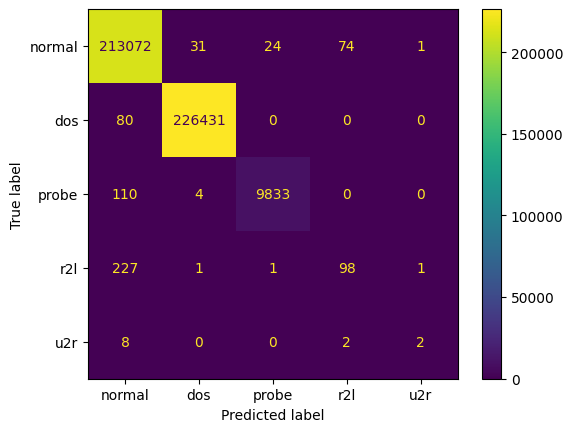

In [ ]:
# confusion matrix 시각화
disp = ConfusionMatrixDisplay(conf_mat, display_labels=['normal', 'dos', 'probe', 'r2l', 'u2r'])
disp.plot()

In [ ]:
# 모델의 해석
np.round(model.coef_, 1)

array([[-12. ,   1. ,  -1.1,   0.2,   3.4,   0. ,   2.6,  -0.3,   3. ,
          7.5,  -1.9,  -0.1,  -7.7, -17.3,  -0. ,  -1.3,   0. ,  -0. ,
         -5.3,   0.6,  12.5,   1.2,   2.1,  -5.1,   5.5,  -2.2,  -0.3,
         -1.5,   4.2,  -5.5,   8.2,  -0.7,  -2.8,  -0. ,   6.8,  -0.7,
          3.3,  -2. ,  10.3,  -4.9,  -7.7,  -1.3,  -0. ,   0. ,  -0. ,
         -0.2,   0. ,   0. ,   0. ,   1.2,  -0. ,  -0. ,  -0.9,  -6.4,
         -0. ,  -1.2,   8.2,   0. ,   0. ,   5.2,  -0.2,  -0.6,  -0.1,
          0. ,   0. ,   0.3,   0. ,   0. ,  -0. ,  -3.6,   0. ,   0. ,
          0. ,   0. ,  -0.1,   0. ,  -0.1,   0. ,   0. ,   0. ,   0. ,
         -0. ,   0. ,   0. ,  -0.1,  -1.7,  -0. ,   0. ,  -0. ,   0. ,
          3.2,  -0. ,  -0.2,  -0.1,  -0.4,  -5.4,  -0. ,  -0.9,   0. ,
         -0. ,  -0. ,   0.4,  -0. ,   4. ,  -0.2,  -0. ,  -0.8,   0. ,
          0. ,   0. ,  -0.1,  -0. , -10.9,  -7.8,  -1.4,  12.9,  13.9,
         -2.4,  -7.6,  -0.5,   3.8,  -2.3],
       [  0.1,  -0.4,  -0.6,  -0.

In [ ]:
len(model.coef_[0])

118

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=42)
clf.fit(train_X, train_y)

print(clf.score(test_X, test_y))

pred_y = clf.predict(test_X)

# 모델 성능 - confusion matrix
conf_mat = confusion_matrix(y_true=test_y, y_pred=pred_y)
conf_mat

0.9993117733980177


array([[  657,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     6,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     5,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,    10,     0,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     2,     0,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,   381,     0,     0,     0,
            0,     0,     4,     0,     0,     0,     0,     0,     0